<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Mean_Reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [7]:
#Get the stock data
raw = yf.download('GDX', start="2013-01-01", end="2023-02-28")['Adj Close']
data = pd.DataFrame(raw)

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head()

,Adj Close
Date,
2013-01-02,43.174183
2013-01-03,41.377544
2013-01-04,41.551723
2013-01-07,40.772564
2013-01-08,40.928398


In [9]:
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [10]:
#Defining a trend path 
SMA = 25

In [12]:
data['SMA'] = data['Adj Close'].rolling(SMA).mean()

In [32]:
# Setting a threshold for signal to open long or short
threshold = 3.5

In [33]:
data['distance'] = data['Adj Close'] - data['SMA']

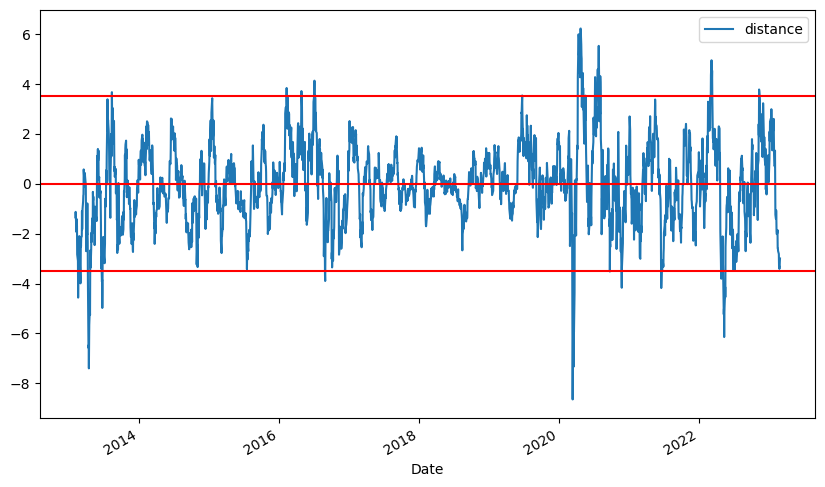

In [34]:
data['distance'].dropna().plot(figsize=(10,6),legend = True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [36]:
#When trend line is greather than upper threshold --> short
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [37]:
#When trend is less than lower threshold --> long
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [38]:
#When trend crosses back into threshold area --> close position (go neutral)
data['position'] = np.where(data['distance'] * 
                            data['distance'].shift(1) < 0,0, data['position'])

In [39]:
#fill na's with 0
data['position'] = data['position'].ffill().fillna(0)

<Axes: xlabel='Date'>

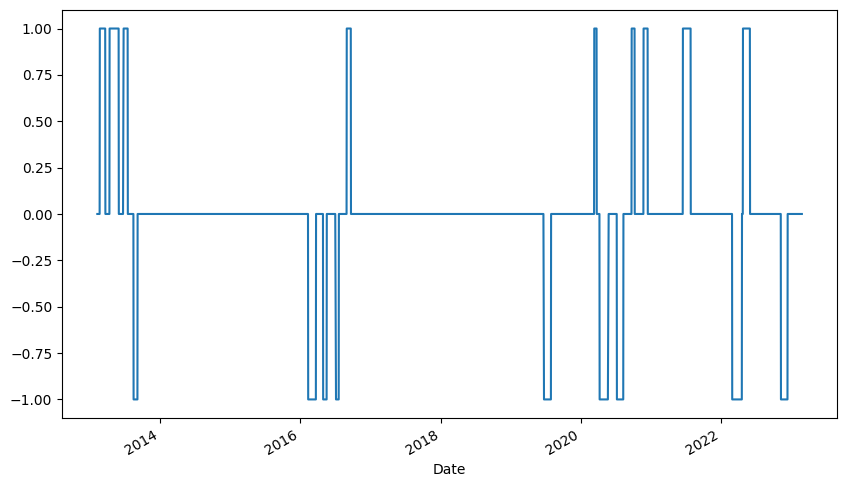

In [40]:
#plot
data['position'].iloc[SMA:].plot(ylim=[-1.1,1.1],figsize=(10,6))

In [41]:
data['strategy'] = data['position'].shift(1) * data['returns']

<Axes: xlabel='Date'>

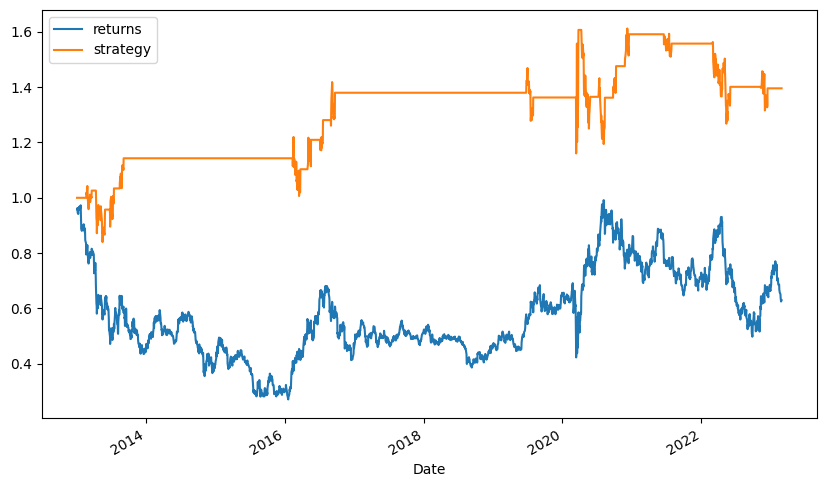

In [42]:
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))